In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

## Funciones para hacer graficos

In [35]:
# Función para crear el gráfico de valores nulos y no nulos
def plot_null_values(df):
    # Contar valores nulos y no nulos por columna
    null_counts = df.isnull().sum()
    non_null_counts = df.notnull().sum()

    # Calcular los porcentajes
    total_counts = null_counts + non_null_counts
    null_percentage = (null_counts / total_counts) * 100
    non_null_percentage = (non_null_counts / total_counts) * 100

    # Configurar el tamaño del gráfico
    fig, ax = plt.subplots(figsize=(6, 4))

    # Crear las barras apiladas
    bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')
    bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightgreen', edgecolor='grey', label='No Nulos')

    # Añadir etiquetas y título
    ax.set_xlabel('Porcentaje')
    ax.set_title(f'Porcentaje de valores nulos y no nulos por columna')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

def plot_univariate_distribution(df):
    """
    Función para generar la distribución de cada columna numérica de un dataframe.
    """
    df.hist(bins=30, figsize=(20, 15))
    plt.suptitle('Distribución de columnas numéricas')
    plt.show()

def plot_correlation_matrix(df):
    """
    Función para generar la matriz de correlación de las columnas numéricas de un dataframe.
    """
    figsize=(10, 6)
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Matriz de correlación')
    plt.show()




## Cargamos Los dataset

In [3]:
df_electrico=pd.read_csv('../Datasets/my2012-2024-battery-electric-vehicles.csv')
df_hibrido=pd.read_csv('../Datasets/my2012-2024-plug-in-hybrid-electric-vehicles.csv')
df_fuel = pd.read_csv('../Datasets/my2023-fuel-consumption-ratings.csv', encoding='latin1')


In [17]:
# Imprimimos la informacion del dataset 
print(df_electrico.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model year             672 non-null    int64  
 1   Make                   672 non-null    object 
 2   Model                  672 non-null    object 
 3   Vehicle class          672 non-null    object 
 4   Motor (kW)             672 non-null    int64  
 5   Transmission           672 non-null    object 
 6   Fuel type              672 non-null    object 
 7   City (kWh/100 km)      672 non-null    float64
 8   Highway (kWh/100 km)   672 non-null    float64
 9   Combined (kWh/100 km)  672 non-null    float64
 10  City (Le/100 km)       672 non-null    float64
 11  Highway (Le/100 km)    672 non-null    float64
 12  Combined (Le/100 km)   672 non-null    float64
 13  Range (km)             672 non-null    int64  
 14  CO2 emissions (g/km)   672 non-null    int64  
 15  CO2 ra

In [18]:
# Imprimimos la informacion del dataset 
print(df_hibrido.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            296 non-null    int64  
 1   Make                  296 non-null    object 
 2   Model                 296 non-null    object 
 3   Vehicle class         296 non-null    object 
 4   Motor (kW)            296 non-null    int64  
 5   Engine size (L)       296 non-null    float64
 6   Cylinders             296 non-null    int64  
 7   Transmission          296 non-null    object 
 8   Fuel type 1           296 non-null    object 
 9   Combined Le/100 km    296 non-null    object 
 10  Range 1 (km)          296 non-null    int64  
 11  Recharge time (h)     296 non-null    float64
 12  Fuel type 2           296 non-null    object 
 13  City (L/100 km)       296 non-null    float64
 14  Highway (L/100 km)    296 non-null    float64
 15  Combined (L/100 km)   2

In [19]:
# Imprimimos la informacion del dataset 
print(df_fuel.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            833 non-null    int64  
 1   Make                  833 non-null    object 
 2   Model                 833 non-null    object 
 3   Vehicle class         833 non-null    object 
 4   Engine size (L)       833 non-null    float64
 5   Cylinders             833 non-null    int64  
 6   Transmission          833 non-null    object 
 7   Fuel type             833 non-null    object 
 8   City (L/100 km)       833 non-null    float64
 9   Highway (L/100 km)    833 non-null    float64
 10  Combined (L/100 km)   833 non-null    float64
 11  Combined (mpg)        833 non-null    int64  
 12  CO2 emissions (g/km)  833 non-null    int64  
 13  CO2 rating            833 non-null    int64  
 14  Smog rating           833 non-null    int64  
dtypes: float64(4), int64(6)

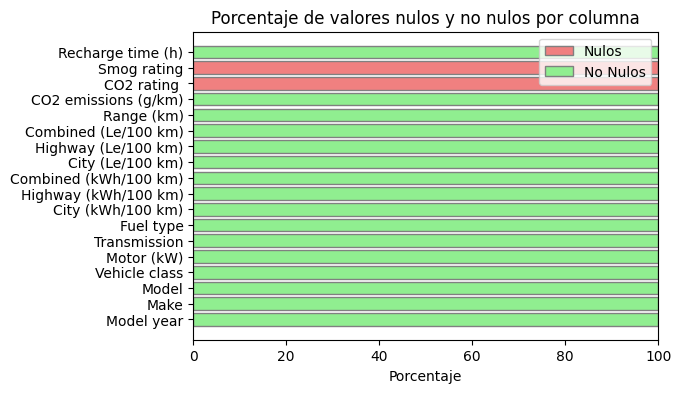

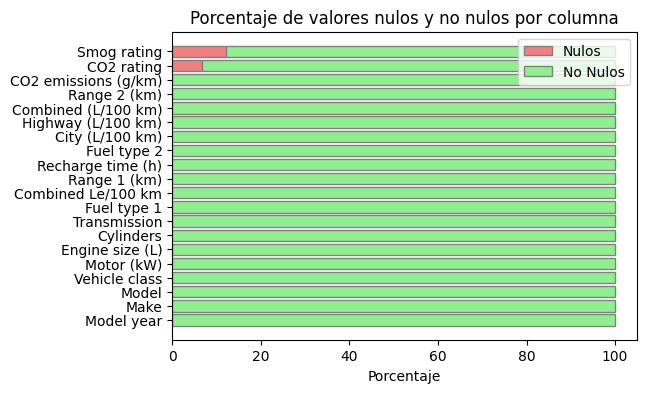

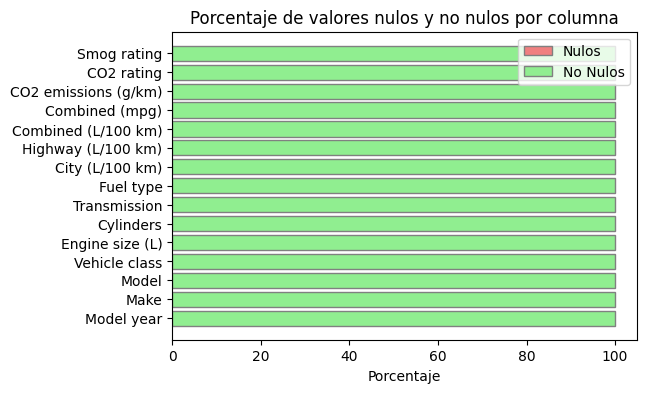

In [30]:
# Usamos la funcion para mostrar los graficos
plot_null_values(df_electrico)
plot_null_values(df_hibrido)
plot_null_values(df_fuel)

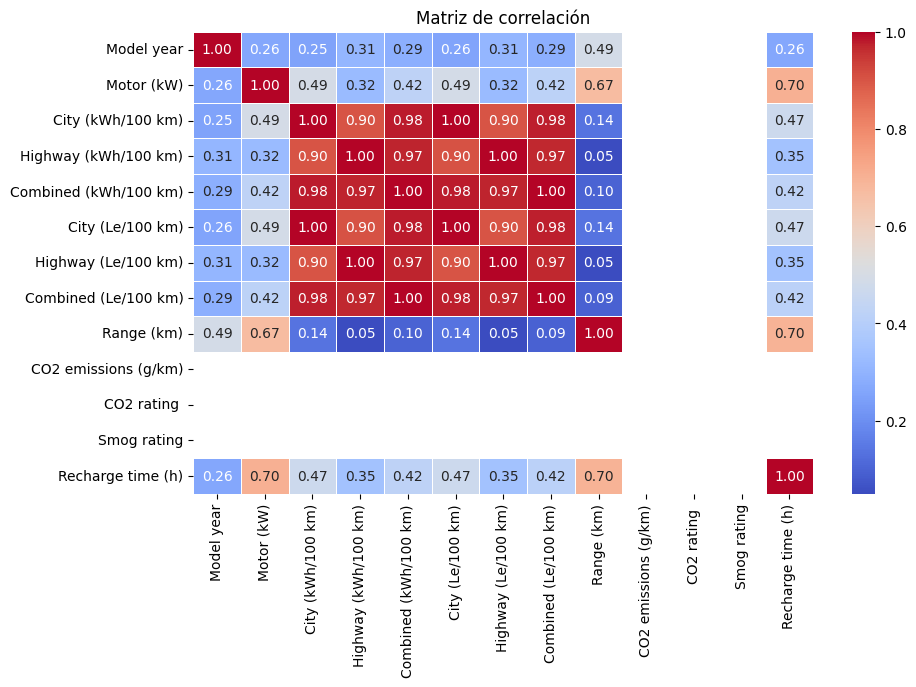

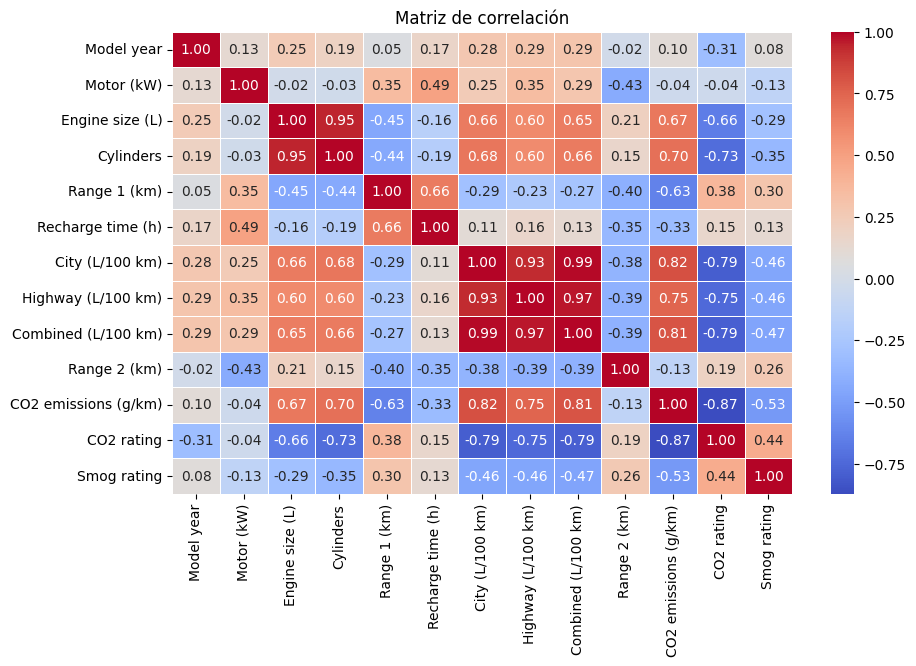

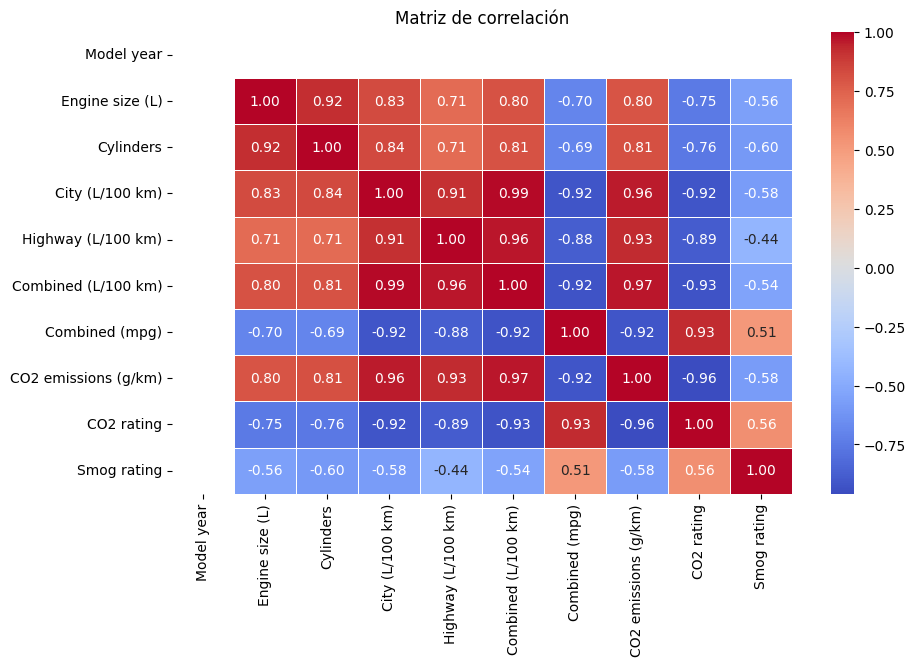

In [36]:
# Usamos la funcion para mostrar los graficos
plot_correlation_matrix(df_electrico)
plot_correlation_matrix(df_hibrido)
plot_correlation_matrix(df_fuel)

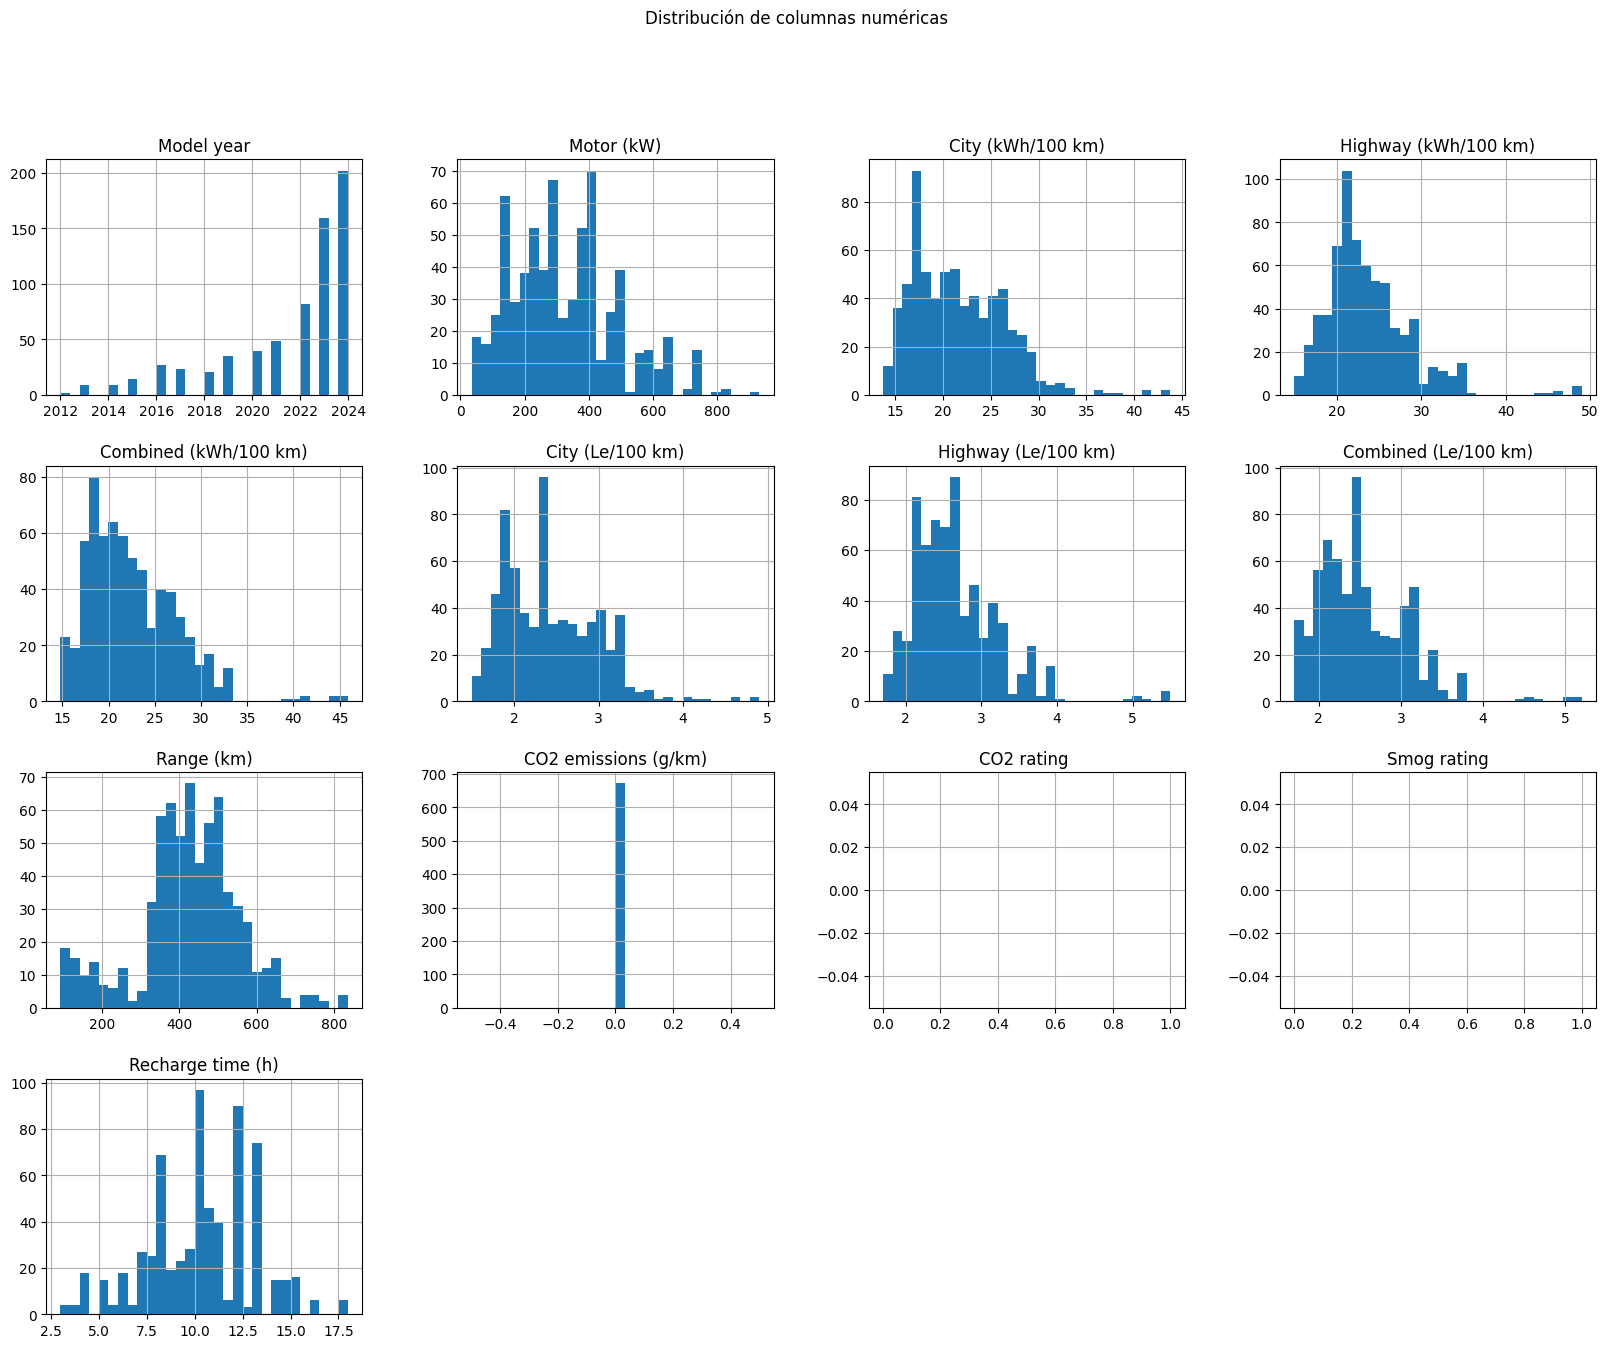

In [56]:
# Usamos la funcion para mostrar los graficos
plot_univariate_distribution(df_electrico)

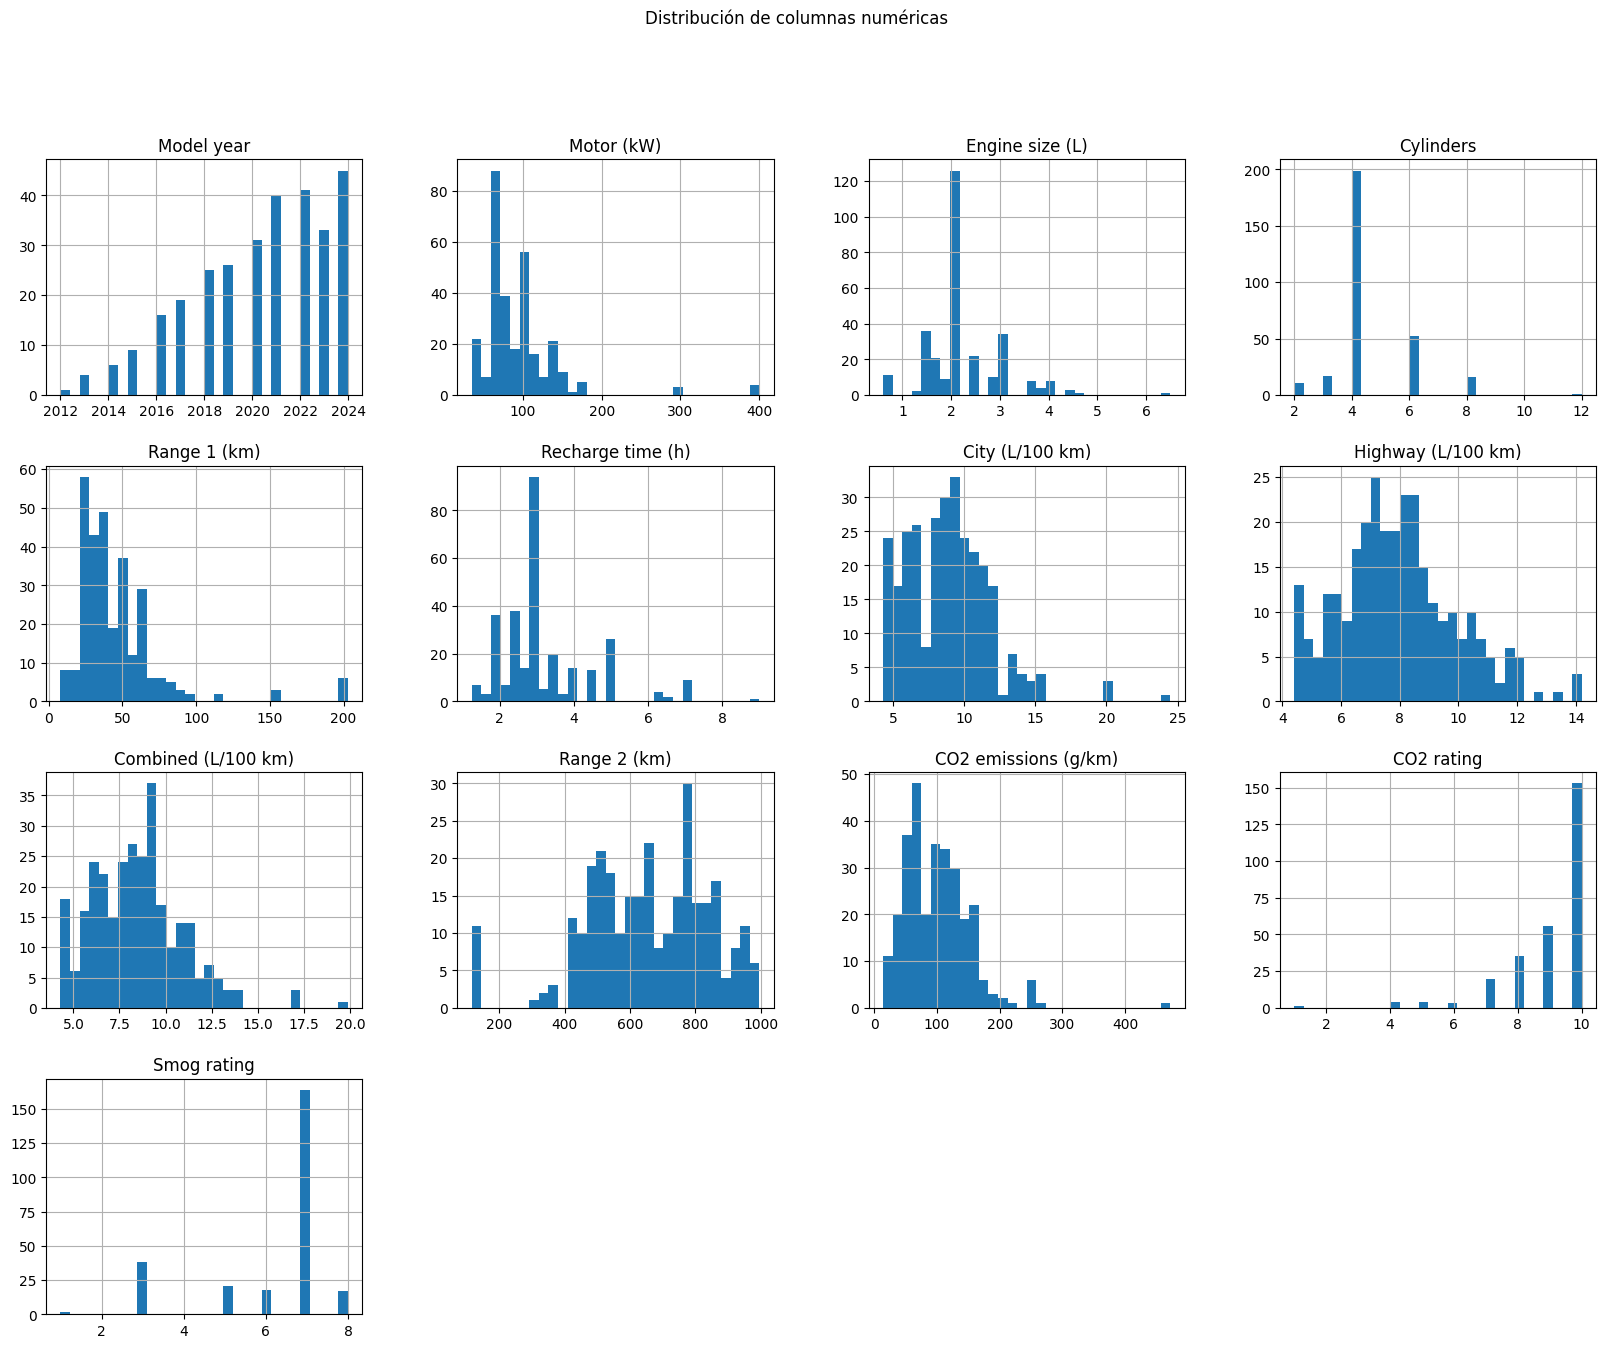

In [57]:
# Usamos la funcion para mostrar los graficos
plot_univariate_distribution(df_hibrido)

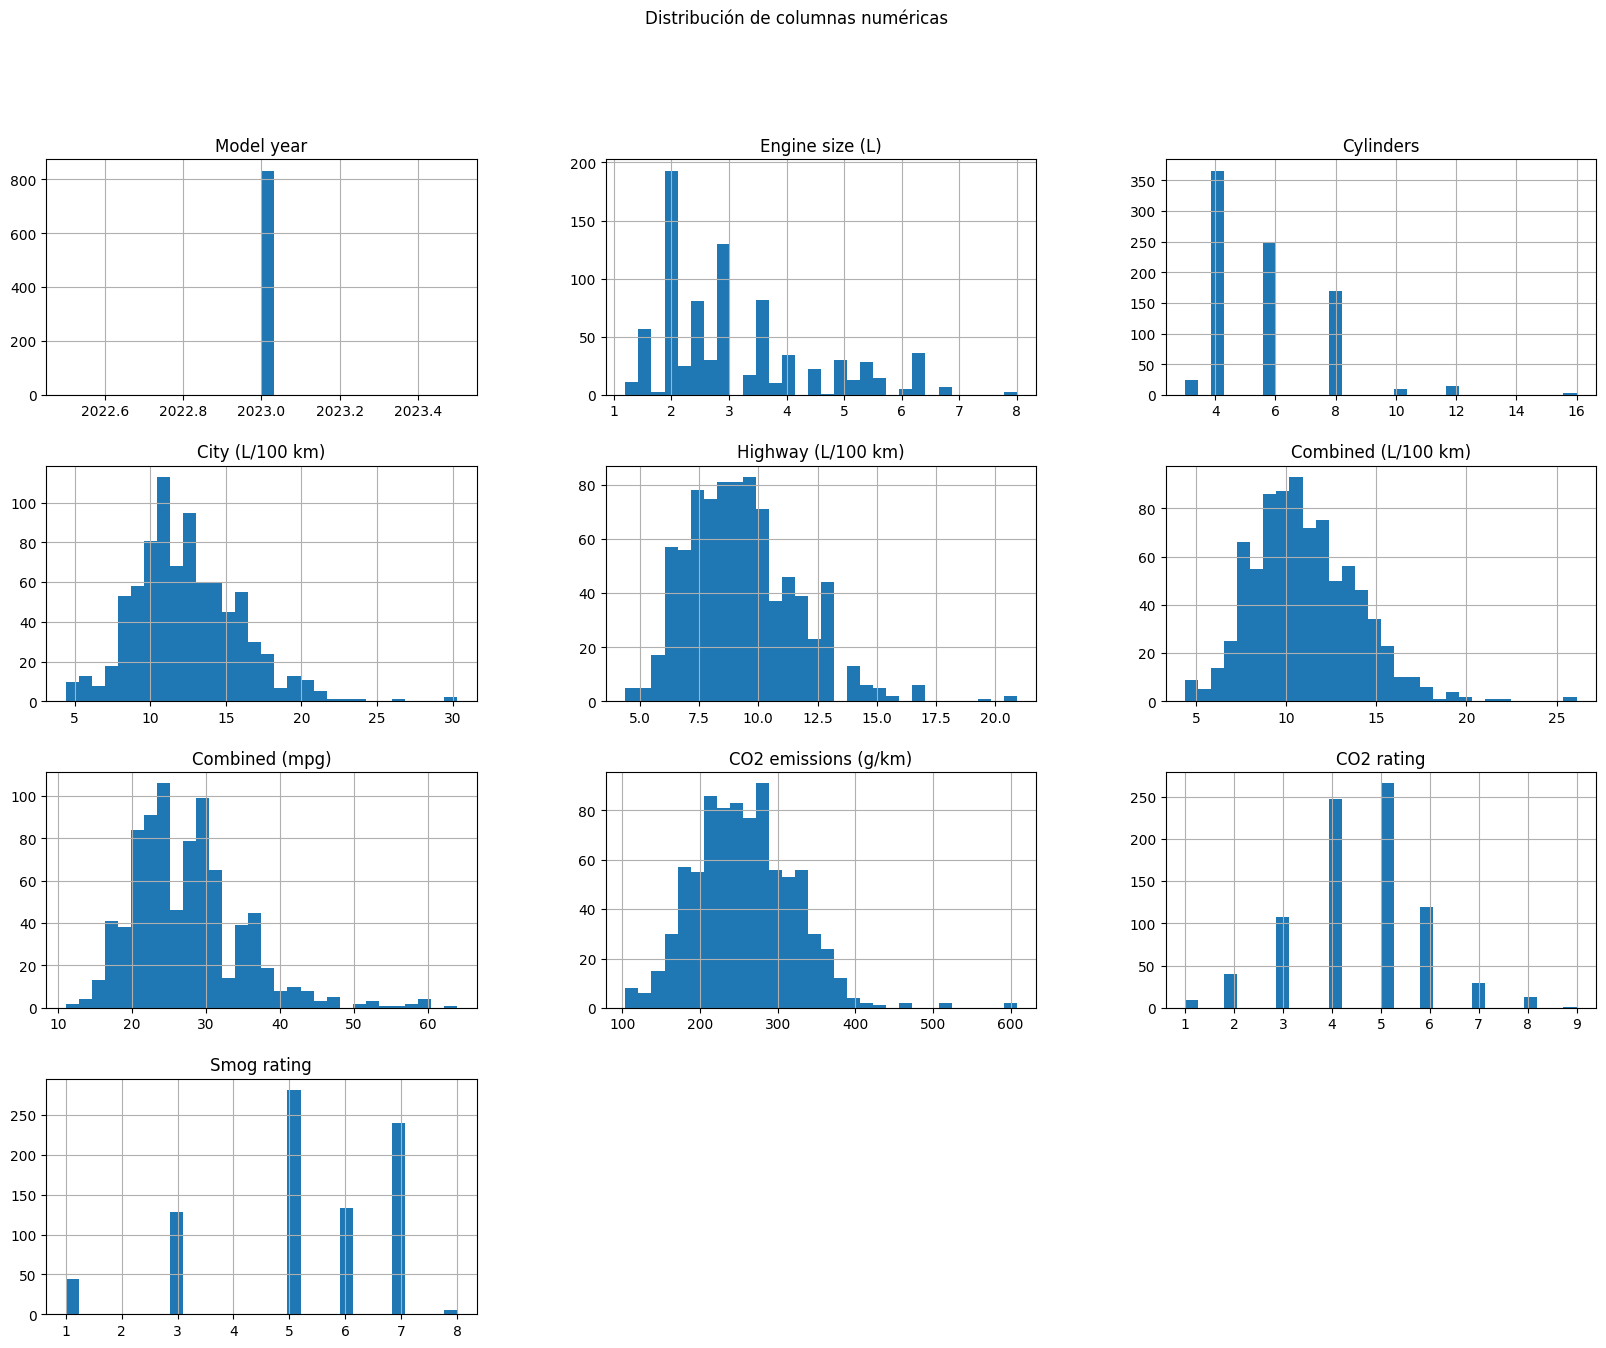

In [58]:
# Usamos la funcion para mostrar los graficos
plot_univariate_distribution(df_fuel)

In [19]:
# Mostramos los nombres las columnas por datastes
print("Columnas de df_electrico:", df_electrico.columns)
print("Columnas de df_hibrido:", df_hibrido.columns)
print("Columnas de df_fuel:", df_fuel.columns)

Columnas de df_electrico: Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Transmission', 'Fuel type', 'City (kWh/100 km)',
       'Highway (kWh/100 km)', 'Combined (kWh/100 km)', 'City (Le/100 km)',
       'Highway (Le/100 km)', 'Combined (Le/100 km)', 'Range (km)',
       'CO2 emissions (g/km)', 'CO2 rating ', 'Smog rating',
       'Recharge time (h)'],
      dtype='object')
Columnas de df_hibrido: Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Engine size (L)', 'Cylinders', 'Transmission', 'Fuel type 1',
       'Combined Le/100 km', 'Range 1 (km)', 'Recharge time (h)',
       'Fuel type 2', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Range 2 (km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating'],
      dtype='object')
Columnas de df_fuel: Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       '

In [42]:
# Mostramo los datos 
df_electrico.head(3)

,Model year,Make,Model,Vehicle class,Motor (kW),Transmission,Fuel type,City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),CO2 emissions (g/km),CO2 rating,Smog rating,Recharge time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,NaN,NaN,7.0
2,2013,Ford,Focus Electric,Compact,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122,0,NaN,NaN,4.0


In [11]:
# Calcular el promedio de 'Recharge time (h)', excluyendo los valores nulos
promedio_recharge_time = round(df_electrico['Recharge time (h)'].mean(), 2)
promedio_range= round(df_electrico['Range (km)'].mean(), 2)

print(f"El promedio de tiempo de regarga es: {promedio_recharge_time} horas")
print(f"La distancia que el vehículo puede recorrer con una carga completa de la batería es: {promedio_range} km")

El promedio de tiempo de regarga es: 10.16 horas
La distancia que el vehículo puede recorrer con una carga completa de la batería es: 425.54 km


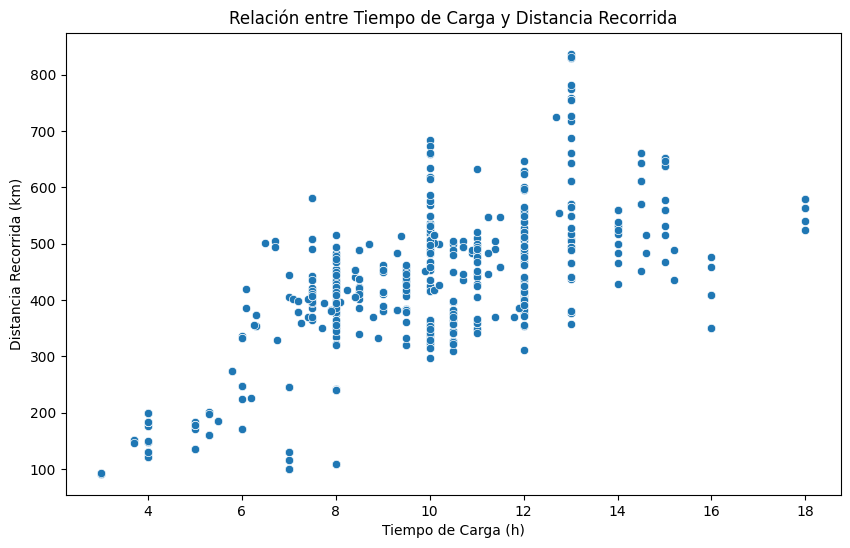

In [41]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_electrico, x='Recharge time (h)', y='Range (km)')

# Añadir títulos y etiquetas
plt.title('Relación entre Tiempo de Carga y Distancia Recorrida')
plt.xlabel('Tiempo de Carga (h)')
plt.ylabel('Distancia Recorrida (km)')

# Mostrar el gráfico
plt.show()

In [15]:
# Calcular el coeficiente de correlación
correlacion = df_electrico[['Recharge time (h)', 'Range (km)']].corr().iloc[0, 1]

print(f"El coeficiente de correlación entre 'Recharge time (h)' y 'Range (km)' es: {correlacion:.2f}")

El coeficiente de correlación entre 'Recharge time (h)' y 'Range (km)' es: 0.70


In [44]:
df_fuel.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6


In [52]:
# Calcular promedios asegurando que las columnas existen
try:
    promedios_electrico = round(df_electrico.mean(numeric_only=True),2)
    promedios_hibrido = round(df_hibrido.mean(numeric_only=True),2)
    promedios_fuel = round(df_fuel.mean(numeric_only=True),2)
except KeyError as e:
    print(f"Error: {e}")

# Costo de electricidad y combustible
costo_electricidad = 0.15  # $/kWh
costo_combustible = 3.5    # $/L

# Calcular gasto económico por 100 km
gasto_electrico = promedios_electrico.get('Combined (kWh/100 km)', 0) * costo_electricidad
gasto_hibrido = promedios_hibrido.get('Combined (L/100 km)', 0) * costo_combustible
gasto_fuel = promedios_fuel.get('Combined (L/100 km)', 0) * costo_combustible

# Crear un DataFrame para comparar los promedios
df_comparacion = pd.DataFrame({
    'Tipo de Vehículo': ['Eléctrico', 'Híbrido', 'Combustión (Fuel)'],
    'Gasto Económico ($/100 km)': [gasto_electrico, gasto_hibrido, gasto_fuel],
    'Emisiones de CO2 (g/km)': [
        promedios_electrico.get('CO2 emissions (g/km)', None),
        promedios_hibrido.get('CO2 emissions (g/km)', None),
        promedios_fuel.get('CO2 emissions (g/km)', None)
    ],
    'Calificación de Smog': [
        promedios_electrico.get('Smog rating', None),
        promedios_hibrido.get('Smog rating', None),
        promedios_fuel.get('Smog rating', None)
    ]
})

# Mostrar la comparación
df_comparacion


,Tipo de Vehículo,Gasto Económico ($/100 km),Emisiones de CO2 (g/km),Calificación de Smog
0,Eléctrico,3.378,0.00,NaN
1,Híbrido,29.610,99.42,6.20
2,Combustión (Fuel),38.675,257.47,5.24


### Funtes
Valor del combustible promedio: https://gasprices.aaa.com

Valor del la carga del coche eléctrico: https://www.energysage.com/ev-charging/electric-vehicle-charging-cost/

posx and posy should be finite values
posx and posy should be finite values


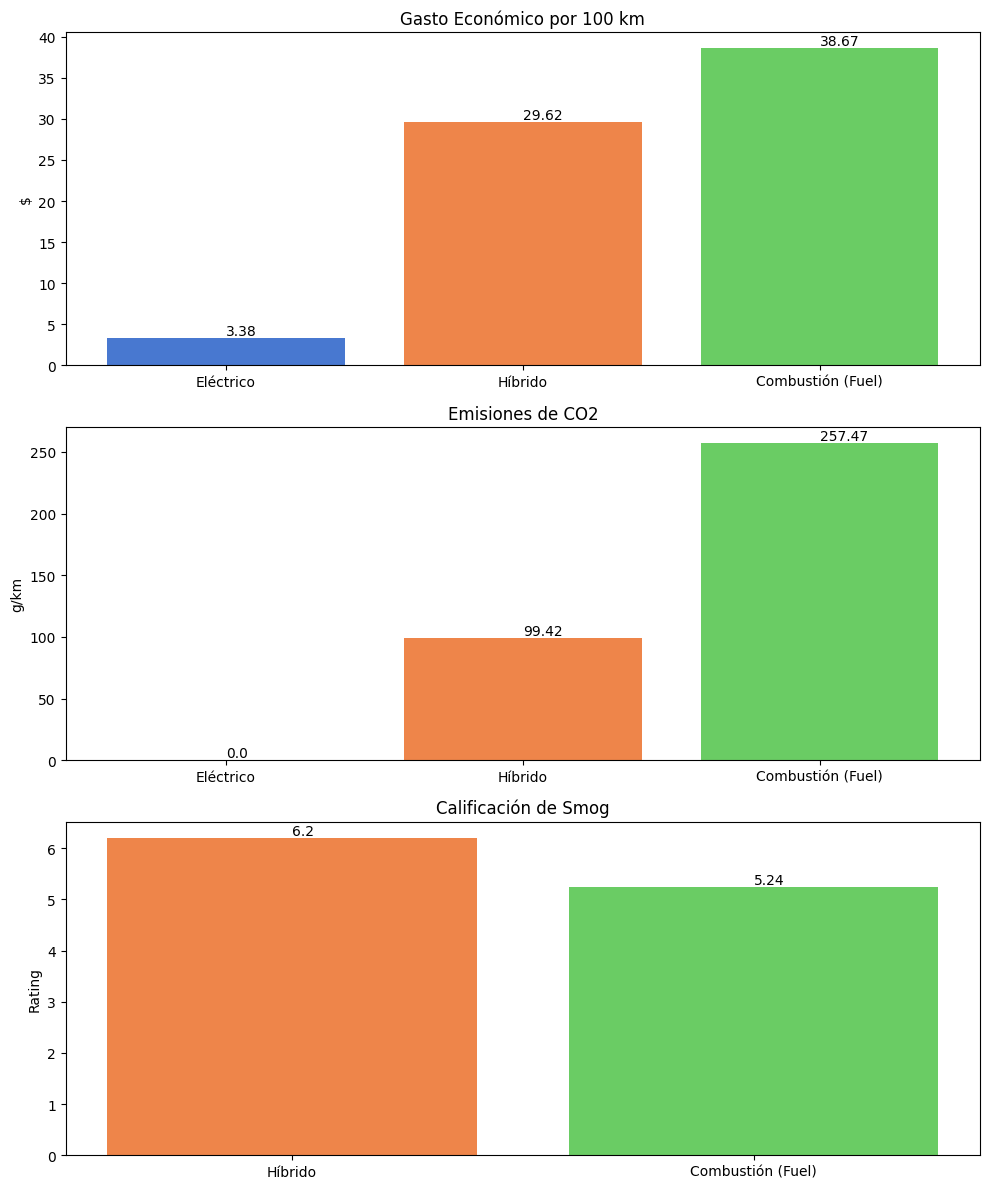

In [48]:
# Usar la paleta de colores Set2 de seaborn
palette = sns.color_palette("muted")

# Gráficos de barras para comparar los valores
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Gasto Económico
bars = ax[0].bar(df_comparacion['Tipo de Vehículo'], df_comparacion['Gasto Económico ($/100 km)'], color=palette)
ax[0].set_title('Gasto Económico por 100 km')
ax[0].set_ylabel('$')
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Emisiones de CO2
bars = ax[1].bar(df_comparacion['Tipo de Vehículo'], df_comparacion['Emisiones de CO2 (g/km)'], color=palette)
ax[1].set_title('Emisiones de CO2')
ax[1].set_ylabel('g/km')
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Calificación de Smog
bars = ax[2].bar(df_comparacion['Tipo de Vehículo'], df_comparacion['Calificación de Smog'], color=palette)
ax[2].set_title('Calificación de Smog')
ax[2].set_ylabel('Rating')
for bar in bars:
    yval = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


El costo de la electricidad varía según el estado e incluso según la ciudad en el mismo estado; puede variar desde aproximadamente 13 centavos por kilovatio por hora (kWh) a 47 centavos en los Estados Unidos continentales 

In [51]:
# Calcular desviaciones estándar asegurando que las columnas existen
try:
    std_electrico = round(df_electrico.std(numeric_only=True),2)
    std_hibrido = round(df_hibrido.std(numeric_only=True),2)
    std_fuel = round(df_fuel.std(numeric_only=True),2)
except KeyError as e:
    print(f"Error: {e}")

# Crear un DataFrame para comparar las desviaciones estándar
df_comparacion_std = pd.DataFrame({
    'Tipo de Vehículo': ['Eléctrico', 'Híbrido', 'Combustión (Fuel)'],
    'Desviación Estándar Consumo Combinado (Le/100 km o kWh/100 km)': [
        std_electrico.get('Combined (kWh/100 km)', None),
        std_hibrido.get('Combined Le/100 km', None),
        std_fuel.get('Combined (L/100 km)', None)
    ],
    'Desviación Estándar Emisiones de CO2 (g/km)': [
        std_electrico.get('CO2 emissions (g/km)', None),
        std_hibrido.get('CO2 emissions (g/km)', None),
        std_fuel.get('CO2 emissions (g/km)', None)
    ],
    'Desviación Estándar Calificación de Smog': [
        std_electrico.get('Smog rating', None),
        std_hibrido.get('Smog rating', None),
        std_fuel.get('Smog rating', None)
    ]
})

# Mostrar la comparación de desviaciones estándar
df_comparacion_std


,Tipo de Vehículo,Desviación Estándar Consumo Combinado (Le/100 km o kWh/100 km),Desviación Estándar Emisiones de CO2 (g/km),Desviación Estándar Calificación de Smog
0,Eléctrico,4.79,0.00,NaN
1,Híbrido,NaN,53.20,1.56
2,Combustión (Fuel),2.88,64.26,1.67


In [54]:
# Cargamos un dataset que nos proporciona informacion de los moldelos de autos electricos 
df_electric_car = pd.read_csv('../Datasets\ElectricCarData_Clean.csv')

# Resumen del DataFrame
df_electric_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [55]:
# Estadísticas descriptivas
df_electric_car.describe()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [56]:
# Mostrar las primeras filas del DataFrame
df_electric_car.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [57]:
df_electric_car['Brand'].value_counts().head(18)

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Name: count, dtype: int64

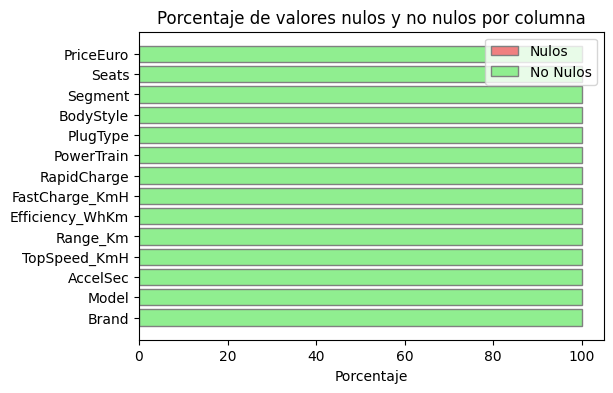

In [58]:
plot_null_values(df_electric_car)

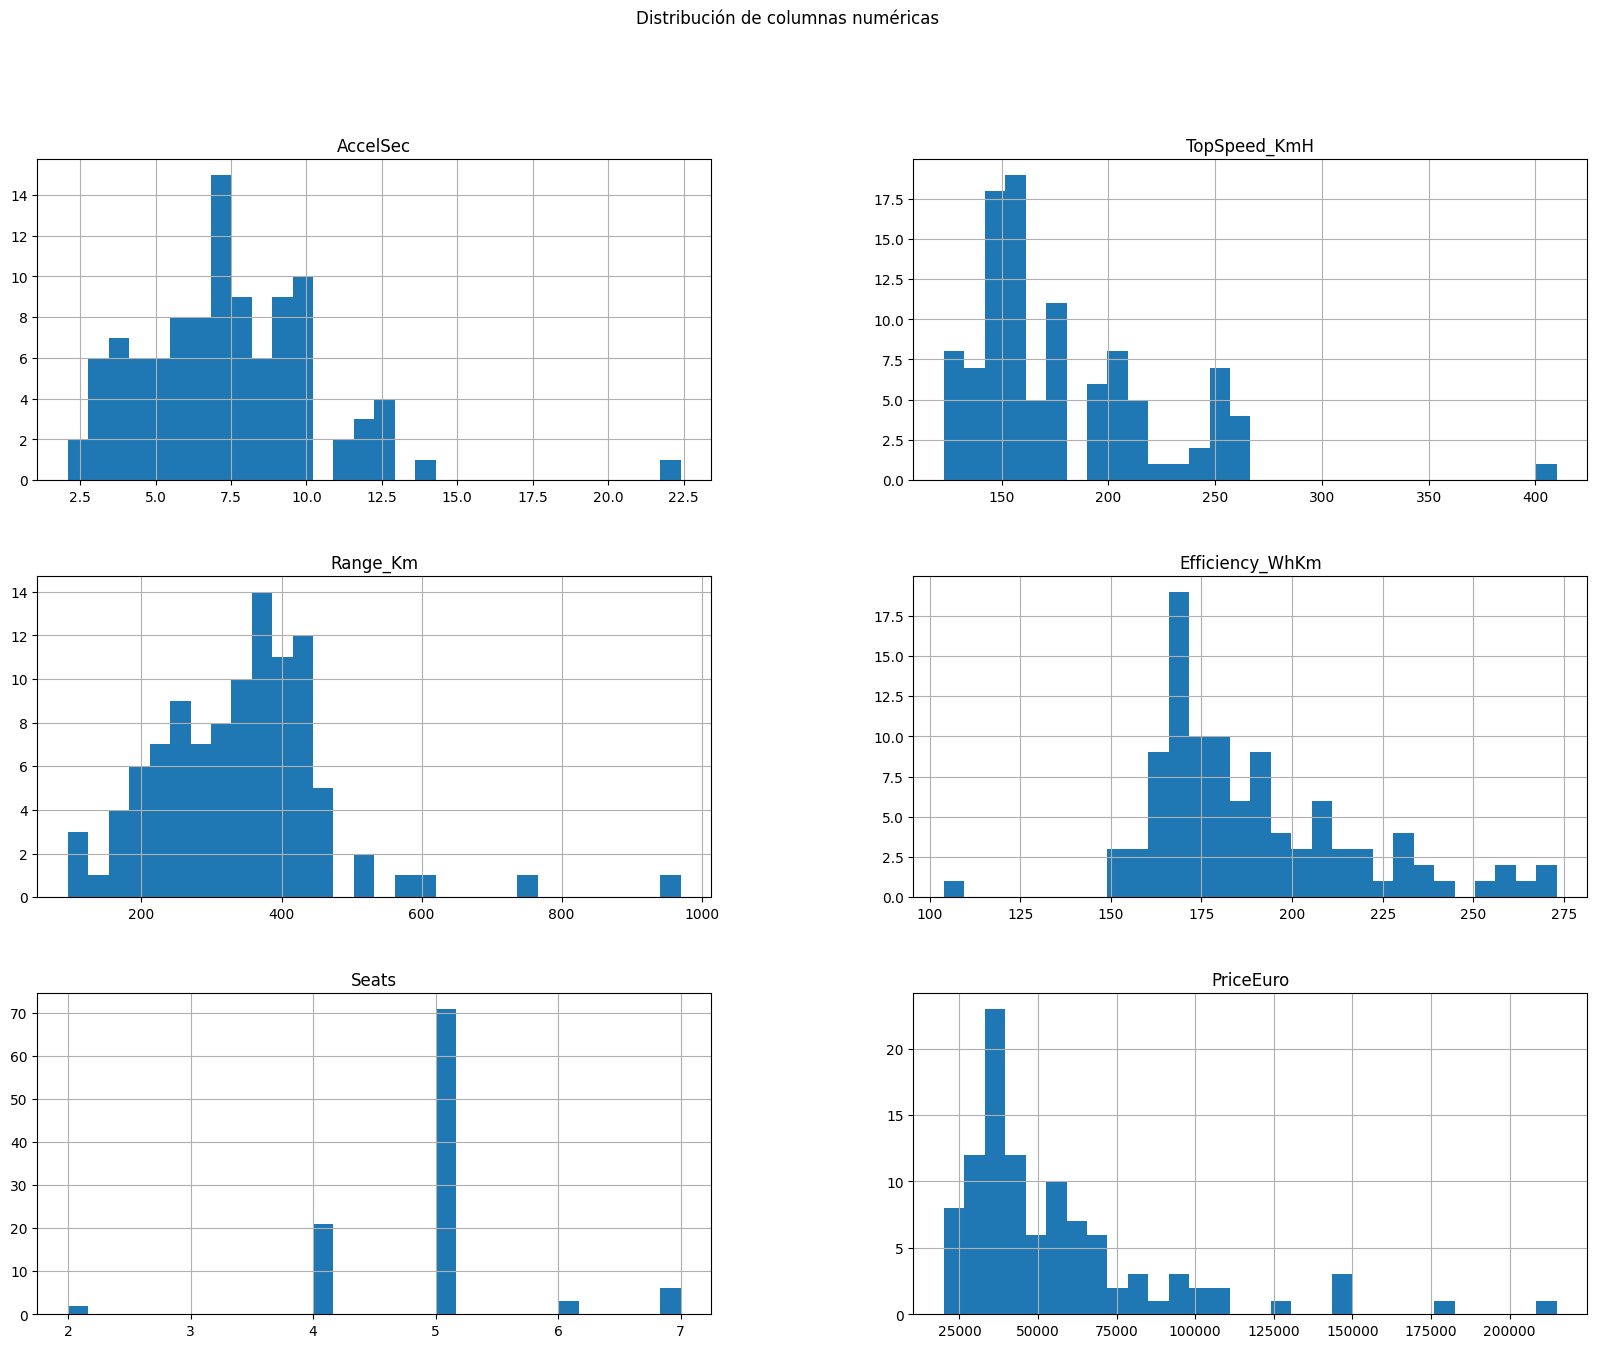

In [59]:
# Análisis univariado: Distribución de cada columna numéricas

plot_univariate_distribution(df_electric_car)

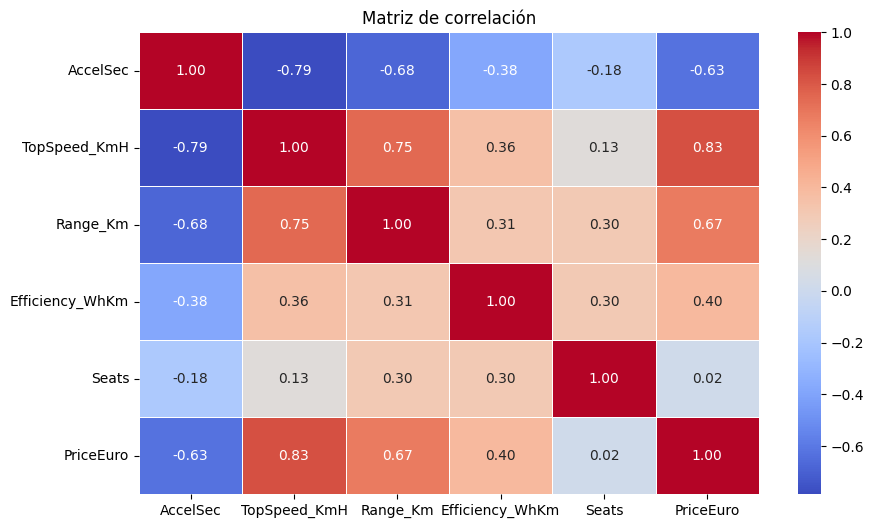

In [60]:
# Matriz de correlación solo para columnas numéricas
plot_correlation_matrix(df_electric_car)

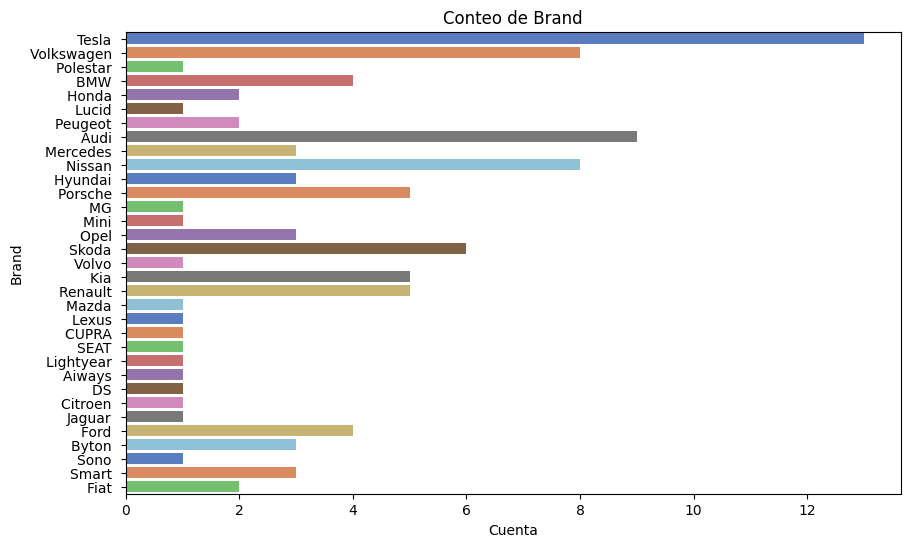

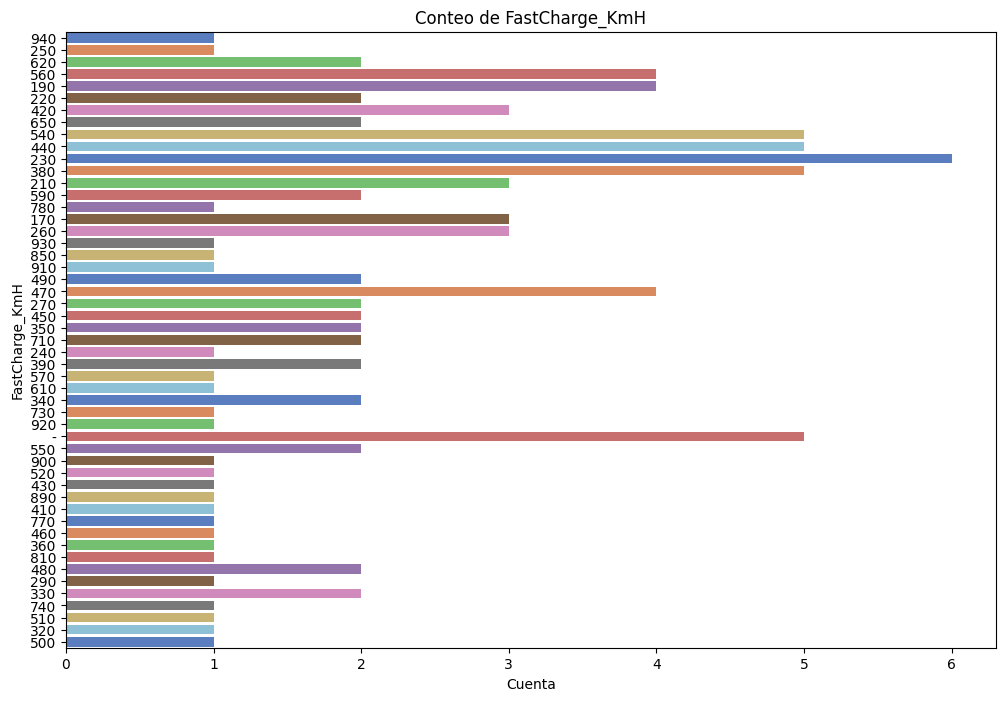

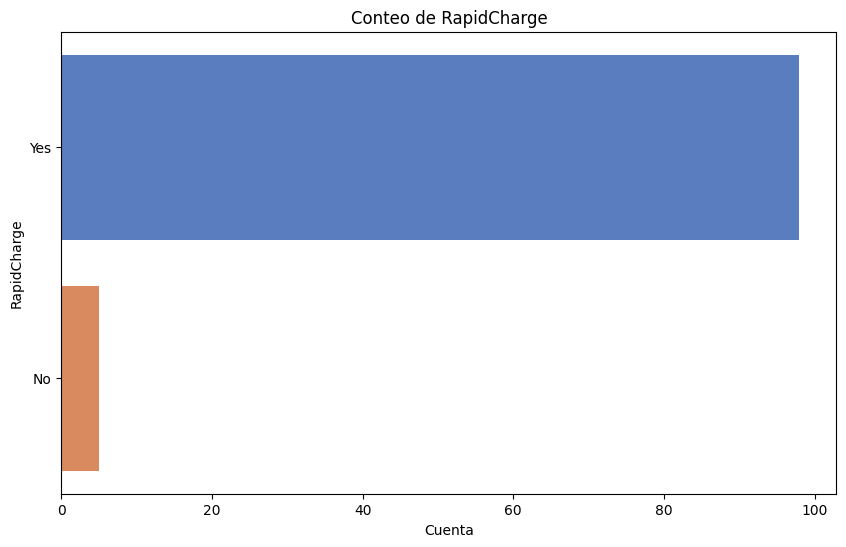

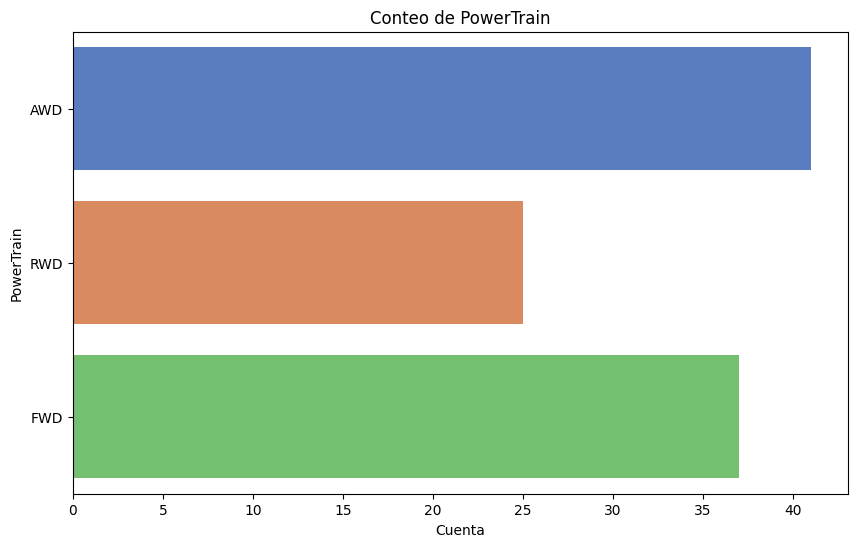

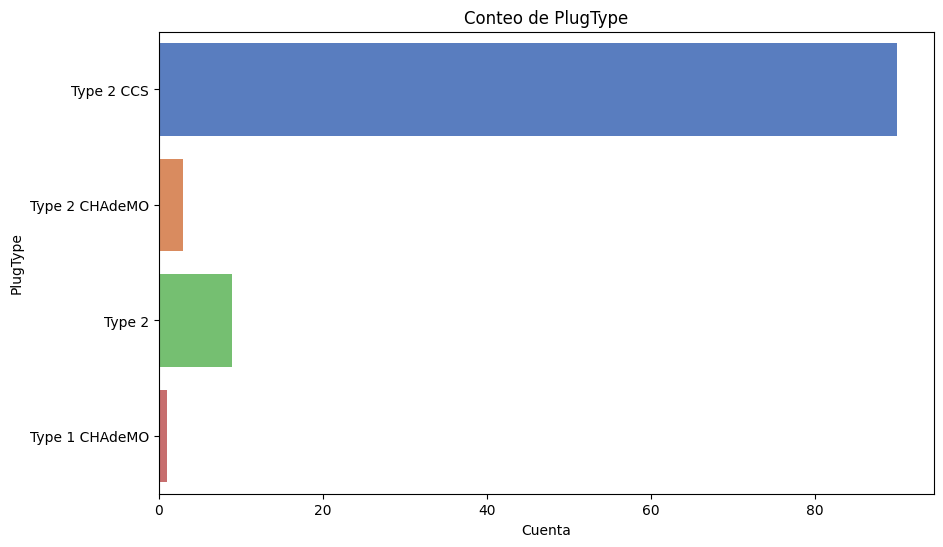

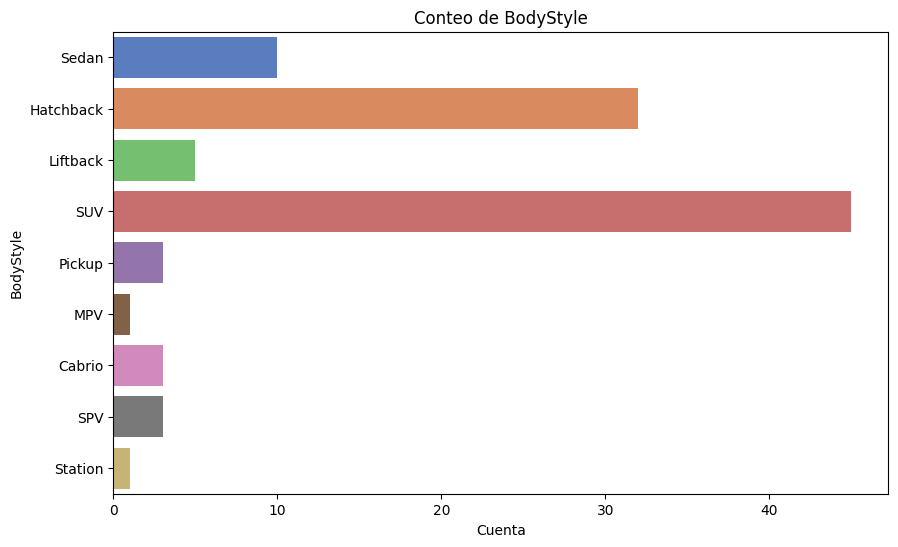

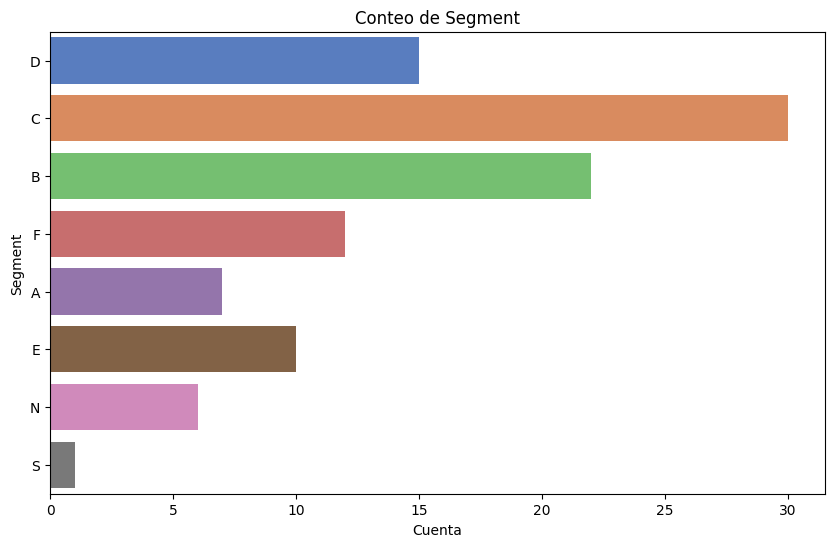

In [61]:
# Paleta de colores personalizada
palette = sns.color_palette("muted")
# Columnas categóricas a analizar, excluyendo 'Model'
categorical_columns = df_electric_car.select_dtypes(include=[object]).columns
categorical_columns = [col for col in categorical_columns if col != 'Model']

# Análisis de variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(12, 8) if column == 'FastCharge_KmH' else (10, 6))
    sns.countplot(y=df_electric_car[column], palette=palette)
    plt.title(f'Conteo de {column}')
    plt.xlabel('Cuenta')
    plt.ylabel(column)
    plt.show()


- Análisis de la eficiencia vs. rendimiento:

Compara la eficiencia energética (Efficiency_WhKm) con el rendimiento (AccelSec y TopSpeed_KmH). ¿Los autos más rápidos tienden a ser menos eficientes?

- Relación precio-rendimiento:

Analiza cómo el precio (PriceEuro) se correlaciona con otras métricas de rendimiento, como la aceleración (AccelSec), velocidad máxima (TopSpeed_KmH) y autonomía (Range_Km). ¿Es el precio un buen indicador del rendimiento general?

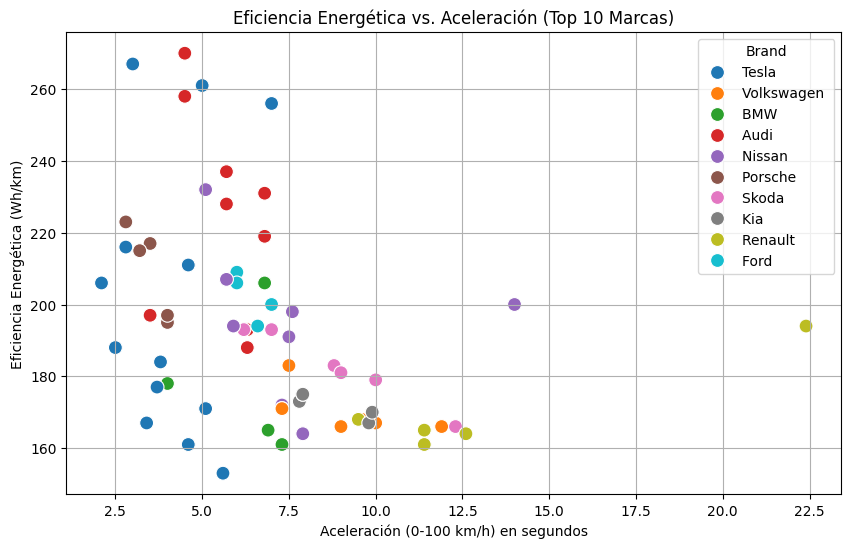

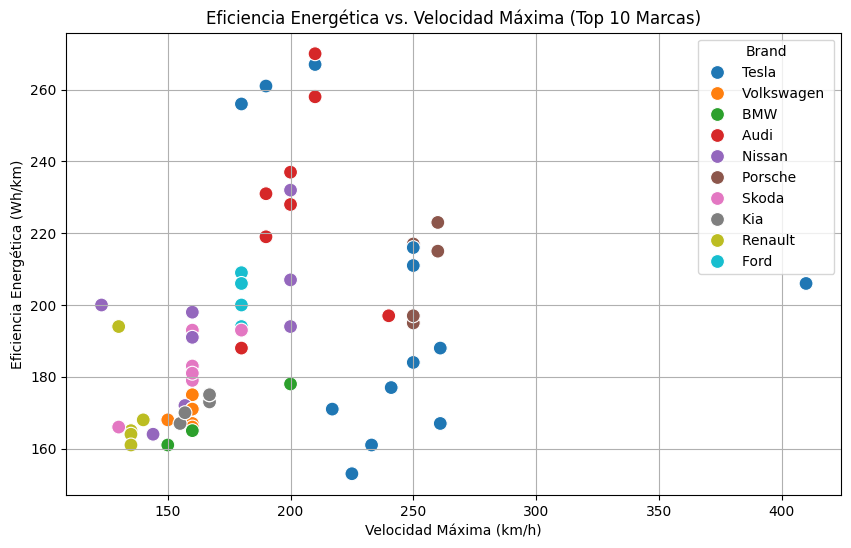

Correlación entre Eficiencia Energética y Aceleración: -0.39
Correlación entre Eficiencia Energética y Velocidad Máxima: 0.34


In [63]:
# Contar la frecuencia de cada marca
brand_counts = df_electric_car['Brand'].value_counts()

# Seleccionar las 10 marcas más comunes
top_brands = brand_counts.nlargest(10).index

# Filtrar el DataFrame para incluir solo las marcas más comunes
df_top_brands = df_electric_car[df_electric_car['Brand'].isin(top_brands)]

# Gráfico de dispersión de la eficiencia energética vs. aceleración
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_brands, x='AccelSec', y='Efficiency_WhKm', hue='Brand', s=100)
plt.title('Eficiencia Energética vs. Aceleración (Top 10 Marcas)')
plt.xlabel('Aceleración (0-100 km/h) en segundos')
plt.ylabel('Eficiencia Energética (Wh/km)')
plt.grid(True)
plt.show()

# Gráfico de dispersión de la eficiencia energética vs. velocidad máxima
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_brands, x='TopSpeed_KmH', y='Efficiency_WhKm', hue='Brand', s=100)
plt.title('Eficiencia Energética vs. Velocidad Máxima (Top 10 Marcas)')
plt.xlabel('Velocidad Máxima (km/h)')
plt.ylabel('Eficiencia Energética (Wh/km)')
plt.grid(True)
plt.show()

# Análisis de correlación para las marcas más comunes
correlation_accel = df_top_brands['Efficiency_WhKm'].corr(df_top_brands['AccelSec'])
correlation_speed = df_top_brands['Efficiency_WhKm'].corr(df_top_brands['TopSpeed_KmH'])

print(f"Correlación entre Eficiencia Energética y Aceleración: {correlation_accel:.2f}")
print(f"Correlación entre Eficiencia Energética y Velocidad Máxima: {correlation_speed:.2f}")

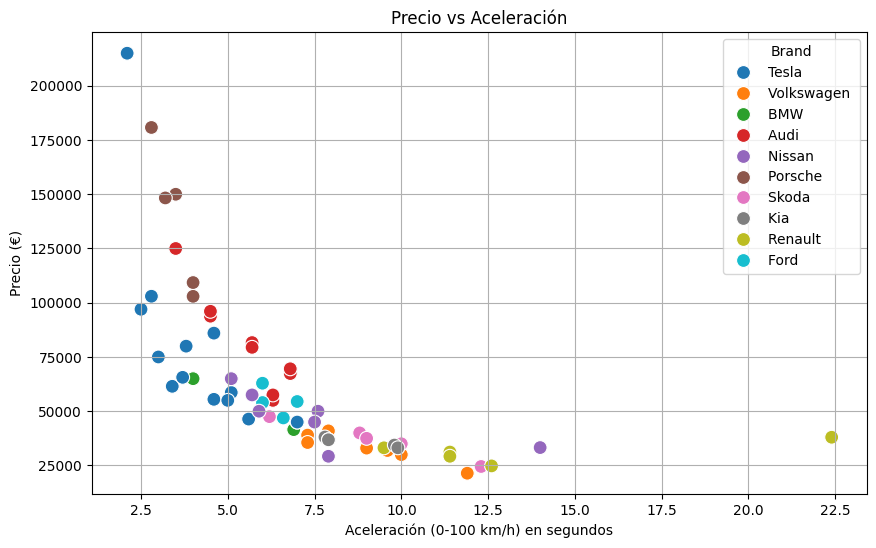

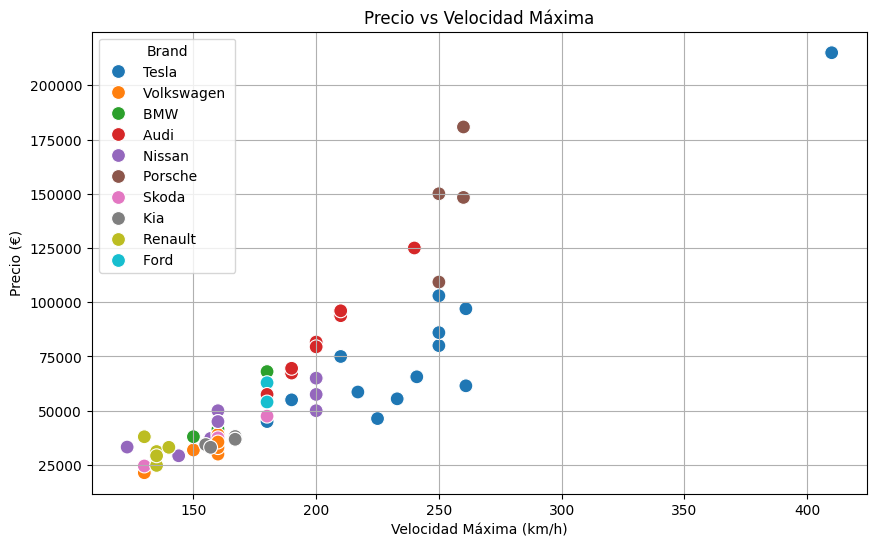

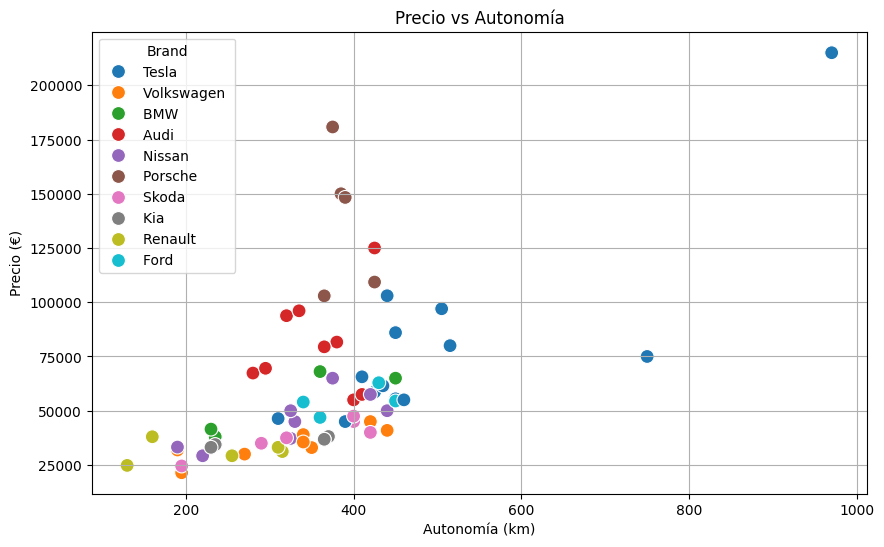

Correlación entre Precio y Aceleración: -0.65
Correlación entre Precio y Velocidad Máxima: 0.88
Correlación entre Precio y Autonomía: 0.60


In [29]:
# Precio vs Aceleración
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_brands, x='AccelSec', y='PriceEuro', hue='Brand', s=100)
plt.title('Precio vs Aceleración')
plt.xlabel('Aceleración (0-100 km/h) en segundos')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

# Precio vs Velocidad Máxima
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_brands, x='TopSpeed_KmH', y='PriceEuro', hue='Brand', s=100)
plt.title('Precio vs Velocidad Máxima')
plt.xlabel('Velocidad Máxima (km/h)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

# Precio vs Autonomía
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_brands, x='Range_Km', y='PriceEuro', hue='Brand', s=100)
plt.title('Precio vs Autonomía')
plt.xlabel('Autonomía (km)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

# Análisis de correlación
correlation_accel = df_top_brands['PriceEuro'].corr(df_top_brands['AccelSec'])
correlation_speed = df_top_brands['PriceEuro'].corr(df_top_brands['TopSpeed_KmH'])
correlation_range = df_top_brands['PriceEuro'].corr(df_top_brands['Range_Km'])

print(f"Correlación entre Precio y Aceleración: {correlation_accel:.2f}")
print(f"Correlación entre Precio y Velocidad Máxima: {correlation_speed:.2f}")
print(f"Correlación entre Precio y Autonomía: {correlation_range:.2f}")